In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Question 1

Text(0.5, 1.0, 'Intensity Transformed')

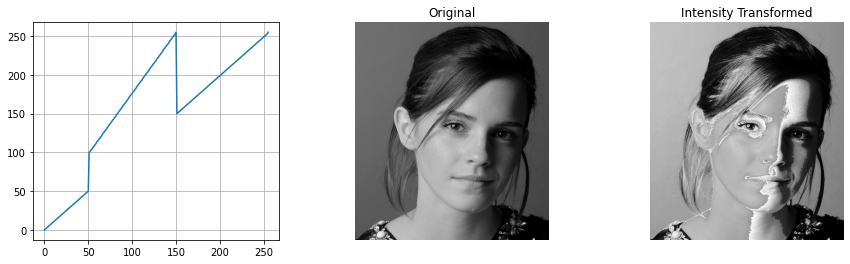

In [2]:
f = cv.imread(r'emma_gray.jpg')
assert f is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)
t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax = plt.subplots(1,3)
fig.set_figwidth(15)

g = cv.LUT(f,t)
ax[1].axis('off')
ax[2].axis('off')
ax[0].grid()
ax[0].plot(t)
ax[1].imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title("Original")
ax[2].set_title("Intensity Transformed")

Question 2

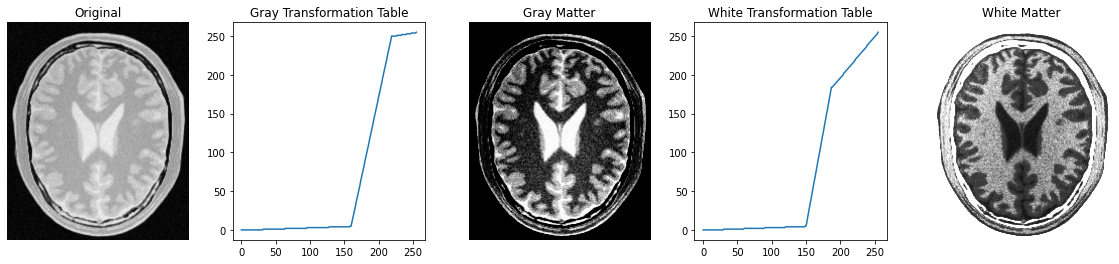

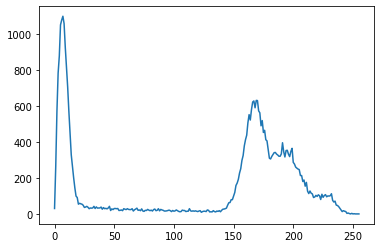

In [60]:
brain = cv.imread(r'brain_proton_density_slice.png')
assert brain is not None

ideal_val_g = 160
g1 = np.linspace(0,5,ideal_val_g)
g2 = np.linspace(5,250,60)
g3 = np.linspace(250,255,256-60-160)
g = np.concatenate((g1,g2,g3),axis=0).astype(np.uint8)
int_g = cv.LUT(brain,g)

ideal_val_w = 150
w1 = np.linspace(0,5,ideal_val_w)
w2 = np.linspace(5,184,38)
w3 = np.linspace(184,255,256-150-38)
w = np.concatenate((w1,w2,w3),axis=0).astype(np.uint8)

int_w = cv.LUT(brain,w)

bar = cv.bitwise_not(int_w)


fig,ax = plt.subplots(1,5)
fig.set_figwidth(20)

fig,ax2 = plt.subplots()

ax[0].imshow(cv.cvtColor(brain, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(int_g, cv.COLOR_BGR2RGB))
ax[4].imshow(cv.cvtColor(bar, cv.COLOR_BGR2RGB))
ax[1].plot(g)
ax[3].plot(w)

ax[0].axis('off')
ax[2].axis('off')
ax[4].axis('off')

ax[0].set_title("Original")
ax[1].set_title("Gray Transformation Table")
ax[2].set_title("Gray Matter")
ax[3].set_title("White Transformation Table")
ax[4].set_title("White Matter")

ax2.plot(cv.calcHist([brain],[0],None,[256],[0,256]))

Question 3

Text(0.5, 1.0, 'Final')

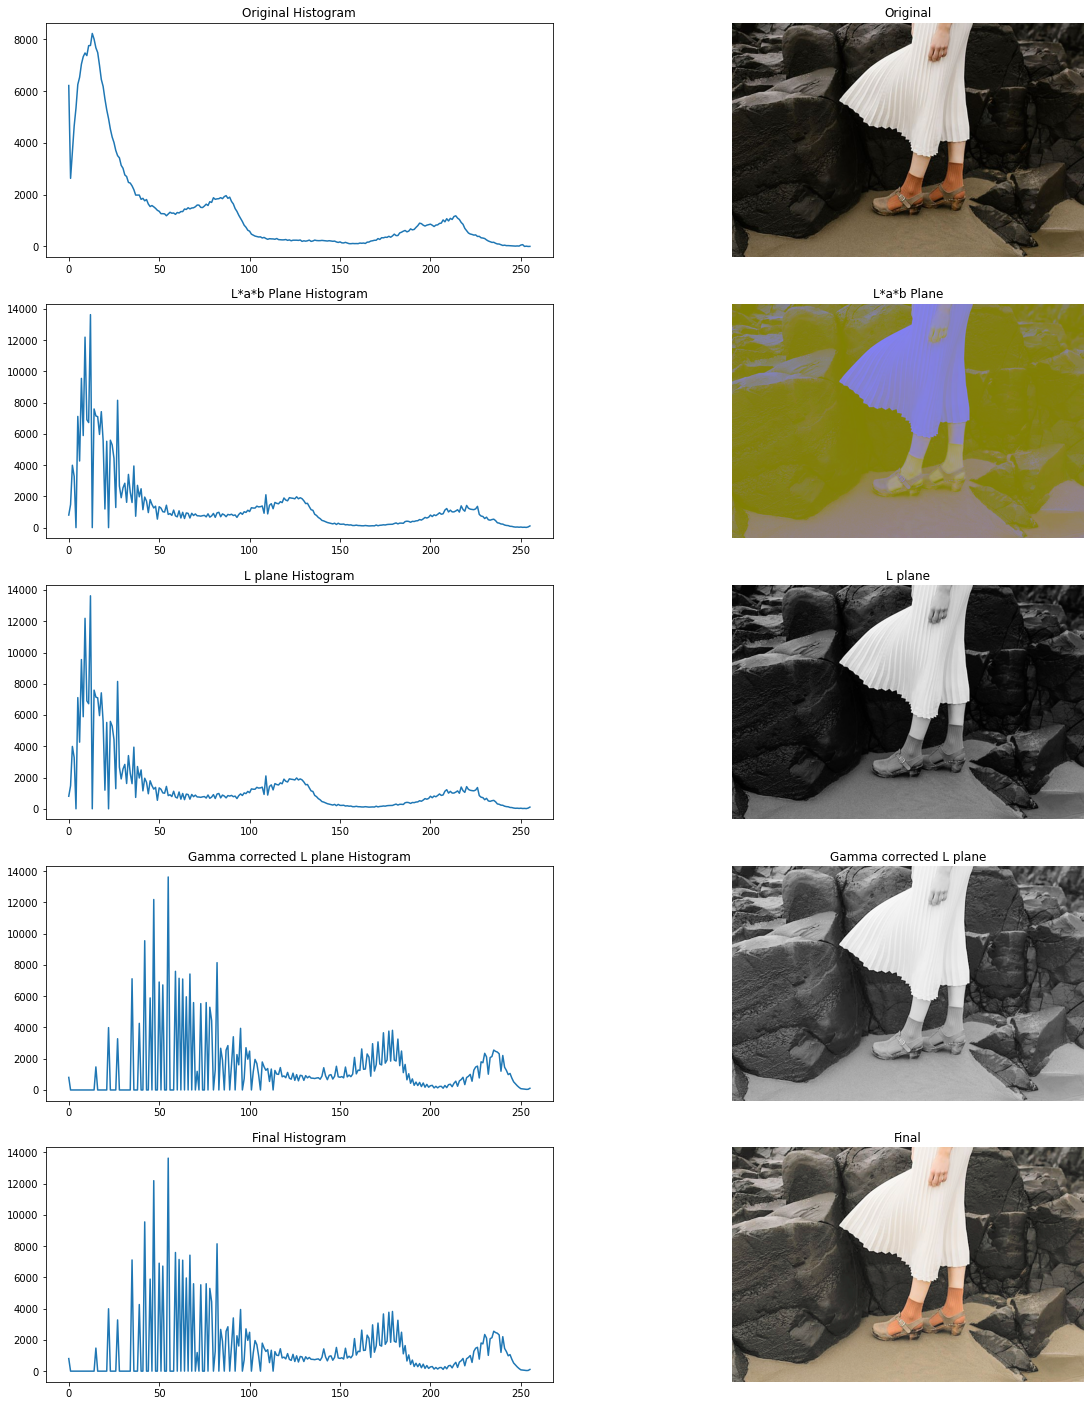

In [87]:
img = cv.imread(r'highlights_and_shadows.jpg')
assert img is not None

img_con = cv.cvtColor(img, cv.COLOR_BGR2LAB)
(L,A,B) = cv.split(img_con)
 
gamma = 0.5
t = np.array([(p/255)**gamma*255 for p in range (0,256)]).astype(np.uint8)
gam = cv.LUT(L,t)

final = cv.merge([gam,A,B])

fig,ax1 = plt.subplots(5,2)

fig.set_figheight(25)
fig.set_figwidth(20)

for i in range(5):
    ax1[i][1].axis('off')

ax1[0][0].plot(cv.calcHist([img],[0],None,[256],[0,256]))
ax1[1][0].plot(cv.calcHist([img_con],[0],None,[256],[0,256]))
ax1[2][0].plot(cv.calcHist([L],[0],None,[256],[0,256]))
ax1[3][0].plot(cv.calcHist([gam],[0],None,[256],[0,256]))
ax1[4][0].plot(cv.calcHist([final],[0],None,[256],[0,256]))

ax1[0][0].set_title("Original Histogram")
ax1[1][0].set_title("L*a*b Plane Histogram")
ax1[2][0].set_title("L plane Histogram")
ax1[3][0].set_title("Gamma corrected L plane Histogram")
ax1[4][0].set_title("Final Histogram")
   
ax1[0][1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax1[1][1].imshow(cv.cvtColor(img_con, cv.COLOR_BGR2RGB))
ax1[2][1].imshow(cv.cvtColor(L, cv.COLOR_BGR2RGB))
ax1[3][1].imshow(cv.cvtColor(gam, cv.COLOR_BGR2RGB))
ax1[4][1].imshow(cv.cvtColor(final, cv.COLOR_LAB2RGB))

ax1[0][1].set_title("Original")
ax1[1][1].set_title("L*a*b Plane")
ax1[2][1].set_title("L plane")
ax1[3][1].set_title("Gamma corrected L plane")
ax1[4][1].set_title("Final")



Question 4

Text(0.5, 1.0, 'Histogram Equalized Image')

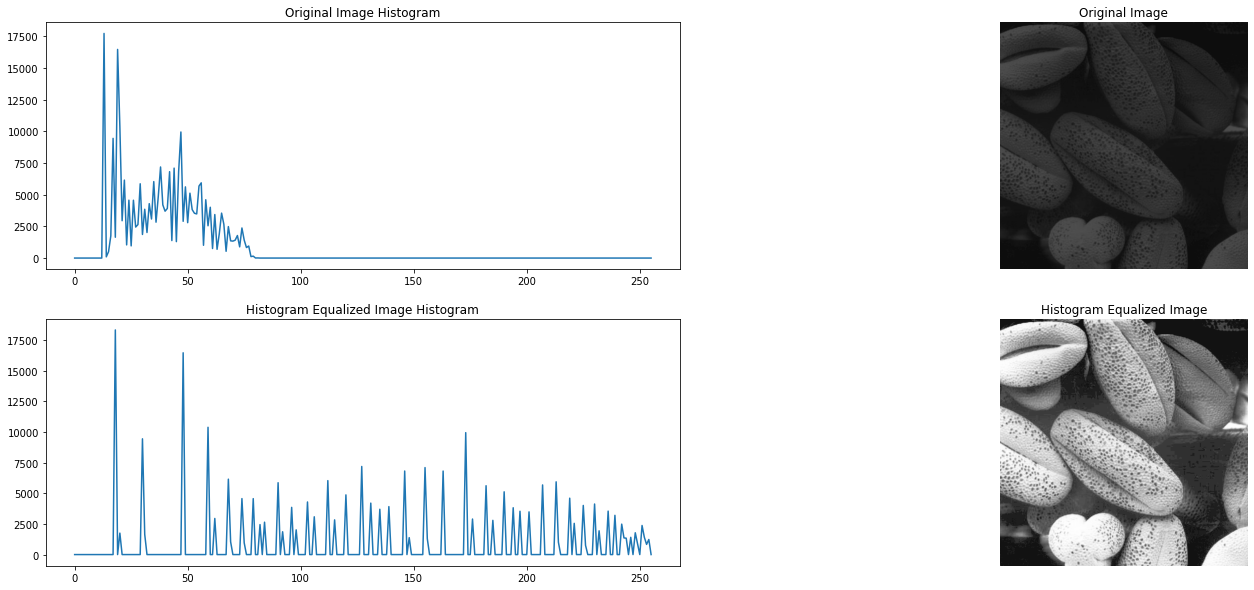

In [88]:
shell = cv.imread(r'shells.png')
assert shell is not None

def equalize_hist(Image):
    hist,bins = np.histogram(Image.ravel(),255,[0,255])
    cdf = hist.cumsum()
    cdf = 255*cdf/cdf[-1]
    cdf = cdf.astype(np.uint8)
    eq_img = cdf[Image]

    return eq_img

equ_image = equalize_hist(shell)

fig,ax1 = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(25)

for i in range(2):
    ax1[i][1].axis('off')

ax1[0][0].plot(cv.calcHist([shell],[0],None,[256],[0,256]))
ax1[1][0].plot(cv.calcHist([equ_image],[0],None,[256],[0,256]))

ax1[0][0].set_title("Original Image Histogram")
ax1[1][0].set_title("Histogram Equalized Image Histogram")

ax1[0][1].imshow(cv.cvtColor(shell, cv.COLOR_BGR2RGB))
ax1[1][1].imshow(cv.cvtColor(equ_image, cv.COLOR_BGR2RGB))

ax1[0][1].set_title("Original Image")
ax1[1][1].set_title("Histogram Equalized Image")

Question 5 a)

In [58]:
woman = cv.imread(r'im02small.png')
sample_im = cv.imread(r'im02.png')

factor = 4

z_rows = int(np.shape(woman)[0]*factor)
z_cols = int(np.shape(woman)[1]*factor)
z_channels = np.shape(woman)[2]
zoomed = np.zeros((z_rows,z_cols,z_channels))


for i in range(z_rows):
    for j in range(z_cols):
        x = min(int(round(i/factor))-1,np.shape(woman)[0])
        y = min(int(round(j/factor))-1,np.shape(woman)[1])
        zoomed[i,j,:] = woman[x,y,:]

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', woman)
cv.waitKey(0)
cv.imshow('Image', zoomed.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

ssd = np.sqrt((np.sum((sample_im - zoomed)**2))/(int(np.shape(woman)[0]*factor)*int(np.shape(woman)[1]*factor)*np.shape(woman)[2]))
print(ssd)

11.322993528053551


Question 5 b)

Question 6 a)

(-0.5, 181.5, 189.5, -0.5)

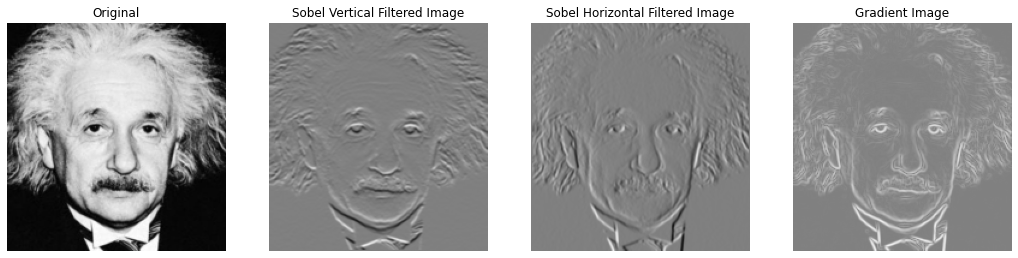

In [74]:
ein = cv.imread(r'einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2).astype('float')
assert ein is not None

ker_sv = np.array([(1,2,1),(0,0,0),(-1,-2,-1)], dtype = 'float')
ker_sh = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype = 'float')
im_avg_sv = cv.filter2D(ein,-1,ker_sv)
im_avg_sh = cv.filter2D(ein,-1,ker_sh)
im_gr = np.sqrt(im_avg_sv**2+im_avg_sh**2)

fig,ax=plt.subplots(1,4,figsize=(18,6))
ax[0].set_title('Original')
ax[0].imshow(ein,cmap="gray")
ax[0].axis('off')
ax[1].set_title('Sobel Vertical Filtered Image')
ax[1].imshow(im_avg_sv,cmap="gray",vmin=-1020,vmax=1020)
ax[1].axis('off')
ax[2].set_title('Sobel Horizontal Filtered Image')
ax[2].imshow(im_avg_sh,cmap="gray",vmin=-1020,vmax=1020)
ax[2].axis('off')
ax[3].set_title('Gradient Image')
ax[3].imshow(im_gr,cmap="gray",vmin=-1020,vmax=1020)
ax[3].axis('off')

Question 6 b) 

(-0.5, 181.5, 189.5, -0.5)

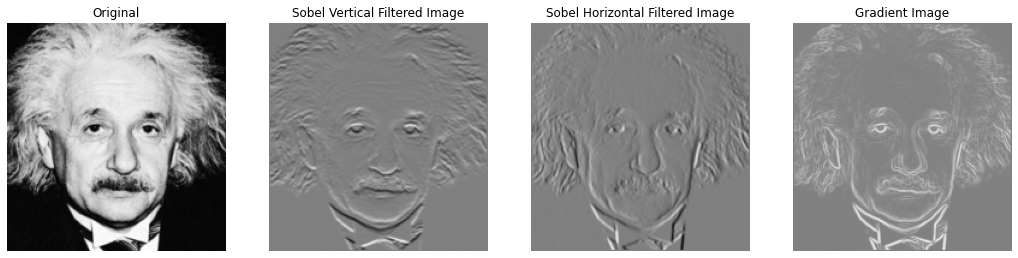

In [73]:
def sob_filter1(image, array):
    blank_array = np.zeros((np.shape(image)[0],np.shape(image)[1]))
    for i in range(1,np.shape(image)[0]-1):
        for j in range(1,np.shape(image)[1]-1):
            blank_array[i][j] = array[0][0]*image[i-1][j-1]+array[0][1]*image[i-1][j]+array[0][2]*image[i-1][j+1]+array[1][0]*image[i][j-1]+array[1][1]*image[i][j]+array[1][2]*image[i][j+1]+array[2][0]*image[i+1][j-1]+array[2][1]*image[i+1][j]+array[2][2]*image[i+1][j+1]
    return blank_array

ein = cv.imread(r'einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2).astype('float')
ker_sv = np.array([(1,2,1),(0,0,0),(-1,-2,-1)], dtype = 'float')
ker_sh = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype = 'float')
sobv_im = sob_filter1(ein, ker_sv)
sobh_im = sob_filter1(ein, ker_sh)
im_gr_manual = np.sqrt(sobv_im**2+sobh_im**2)

fig,ax=plt.subplots(1,4,figsize=(18,6))
ax[0].set_title('Original')
ax[0].imshow(ein,cmap="gray")
ax[0].axis('off')
ax[1].set_title('Sobel Vertical Filtered Image')
ax[1].imshow(sobv_im,cmap="gray",vmin=-1020,vmax=1020)
ax[1].axis('off')
ax[2].set_title('Sobel Horizontal Filtered Image')
ax[2].imshow(sobh_im,cmap="gray",vmin=-1020,vmax=1020)
ax[2].axis('off')
ax[3].set_title('Gradient Image')
ax[3].imshow(im_gr_manual,cmap="gray",vmin=-1020,vmax=1020)
ax[3].axis('off')

Question 6 c)

(-0.5, 181.5, 189.5, -0.5)

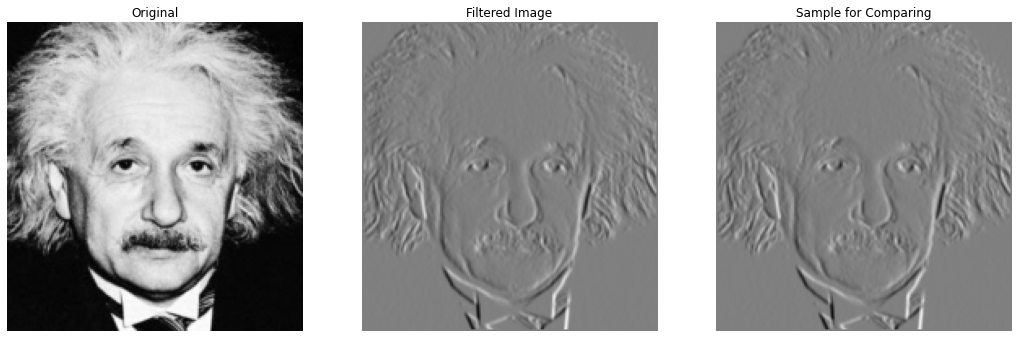

In [72]:
def sob_filter2(image, array1,array2):
    blank_array = np.zeros((np.shape(image)[0],np.shape(image)[1]))
    blank_array2 = np.zeros((np.shape(image)[0],np.shape(image)[1]))

    for i in range(1,np.shape(image)[0]-1):
        for j in range(0,np.shape(image)[1]):
            blank_array[i][j] = array1[0][0]*image[i-1][j]+array1[1][0]*image[i][j]+array1[2][0]*image[i+1][j]

    for i in range(0,np.shape(image)[0]):
        for j in range(1,np.shape(image)[1]-1):
            blank_array2[i][j] = array2[0][0]*blank_array[i][j-1]+array2[0][1]*blank_array[i][j]+array2[0][2]*blank_array[i][j+1]

    return blank_array2

ein = cv.imread(r'einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2).astype('float')
ker1 = np.array([[1],[2],[1]], dtype = 'float')
ker2 = np.array([(1,0,-1)], dtype = 'float')

ker_sam = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype = 'float')

sob_fil = sob_filter2(ein, ker1, ker2)
sob_sam = sob_filter1(ein, ker_sam)

fig,ax=plt.subplots(1,3,figsize=(18,6))
ax[0].set_title('Original')
ax[0].imshow(ein,cmap="gray")
ax[0].axis('off')
ax[1].set_title('Filtered Image')
ax[1].imshow(sob_fil,cmap="gray",vmin=-1020,vmax=1020)
ax[1].axis('off')
ax[2].set_title('Sample for Comparing')
ax[2].imshow(sob_sam,cmap="gray",vmin=-1020,vmax=1020)
ax[2].axis('off')

Question 7